# Spotify´s Greatest Hits
Author: Ahmad Nizam Anuar

Date: 25/6/2022

### Importing Libraries


In [1]:
# Importing all the necessary packages and libraries

import numpy as np # linear algebra
import pandas as pd # Data pre-processing
import seaborn as sns # Required for plotting
import matplotlib.pyplot as plt # Required for plotting

### Loading Dataset

In [3]:
spotify = pd.read_csv("C:/Users/ahmad/Desktop/MNRB Assaignment/songs_normalize.csv") # Using pandas lib to read table
spotify.head() # Checking data schema for validation purpose

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [4]:
spotify.tail()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,hip hop


From here we can see that there are 2000 entries in this dataset

### Identifying Missing Values

In [5]:
spotify.info() # Checking presence of any null values in columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


Here we can see that there are a total of 18 columns and no null values in columns

In [8]:
spotify.describe() # Helps to understand if any anomalies are present in numeric columns

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667437,0.720366,5.378000,-5.512435,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


### Identifying duplicated values

In [23]:
dp_rows=spotify.duplicated().sum()
print("Number of duplicated rows:",dp_rows)

Number of duplicated rows: 59


Here we can see that duplicated values are present, there are a total of 59 rows and need to be treated

### Data Preparation

In [24]:
spotify.drop_duplicates()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


Now we can see that the duplicated values are removed and total rows remaining are 1941 rows.

### Analysis

##### Question 1) Which is the top artists with hit songs that can help increase Will-You-Be-Mine Ltd.'s revenue on Spotify?

In [26]:
artist=spotify["artist"].value_counts()
artist

Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Sidney Samson      1
Cam’ron            1
Elvis Presley      1
Lucenzo            1
Blanco Brown       1
Name: artist, Length: 835, dtype: int64

From here we can see that there is a total of 835 artists present in the tophits category of Spotify


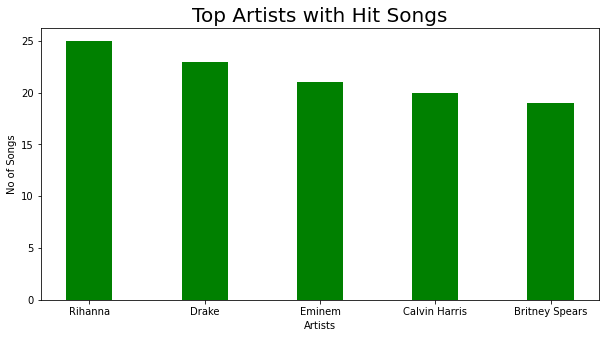

In [33]:
tp_artists_songs= artist[:5]
tp_artists_name =artist[:5].index
fig = plt.figure(figsize = (10, 5))
plt.bar(tp_artists_name,tp_artists_songs,width = 0.4,color="green")
plt.xlabel("Artists")
plt.ylabel("No of Songs")
plt.title('Top Artists with Hit Songs',color = 'black',fontsize = 20)
plt.show()

-Rihanna seems to be the most popular artist with 25 songs of her to be listed as the top-hit over the past 19 years.(2000-2019)

-As a conclusion, Will-You-Be-Mine Ltd. can do a collaboration with Rihanna for marketing purposes and improve their revenue on Spotify.

##### Question 2) Which genre has the most hit songs that can help Will-You-Be-Mine Ltd.´s revenue on Spotify?

In [32]:
genre = spotify['genre'].value_counts()
genre

pop                                      428
hip hop, pop                             277
hip hop, pop, R&B                        244
pop, Dance/Electronic                    221
pop, R&B                                 178
hip hop                                  124
hip hop, pop, Dance/Electronic            78
rock                                      58
rock, pop                                 43
Dance/Electronic                          41
rock, metal                               38
pop, latin                                28
pop, rock                                 26
set()                                     22
hip hop, Dance/Electronic                 16
latin                                     15
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               13
country                                   10
metal                                      9
hip hop, p

Now we can plot a bar chart to visualize the Top 5 genres which are hits

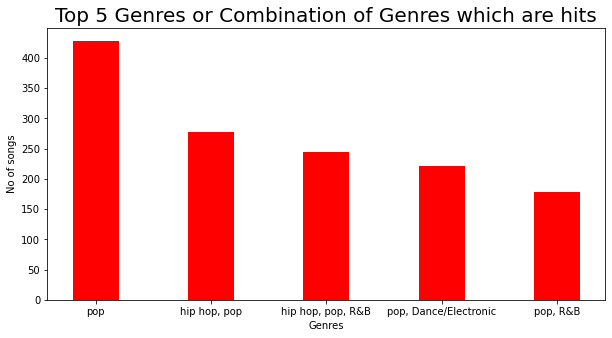

In [34]:
tp_genres=genre[:5]
tp_genres_names=genre[:5].index
fig = plt.figure(figsize = (10, 5))
plt.bar(tp_genres_names,tp_genres,width = 0.4,color='red')
plt.xlabel("Genres")
plt.ylabel("No of songs")
plt.title('Top 5 Genres or Combination of Genres which are hits',color = 'black',fontsize = 20)
plt.show()

-From here we can see that "pop" is the most popular type of genre, with almost a double number of hit songs compared to other top genres.
-"pop" alone contributes to more than 20% of the Genre category.
-As a conclusion, Will-You-Be-Mine Ltd. can promote more "pop" songs to increase their revenue on Spotify

##### Question 3) Which is the most popular song to ever become top-hit?

In [36]:
max_pop= spotify.loc[spotify['popularity']== spotify['popularity'].max()]
max_pop

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.81,1,0.0336,0.0495,0.0177,0.101,0.398,124.053,"rock, pop"


-Based on this finding, we know that "Sweater Weather" from "The Neighbourhood" is the most popular song to ever become top-hit

-As a conclusion, Will-You-Be-Mine Ltd. can produce a song similar like "Sweater Weather" to gain more popularity and increase revenue on Spotify

### The End